In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
mouse_metadata_csv = "data/mouse_metadata.csv"
study_results_csv = "data/study_results.csv"

In [3]:
mouse_metadata = pd.read_csv(mouse_metadata_csv)
study_results = pd.read_csv(study_results_csv)

In [4]:
Pymaceuticals = pd.merge(mouse_metadata, study_results, how='left', on=['Mouse ID', 'Mouse ID'] )
Pymaceuticals.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
Pymaceuticals.shape

(1893, 8)

In [6]:
# check number of mice
total_mice = Pymaceuticals['Mouse ID'].nunique()
total_mice

249

In [7]:
# Find duplicate Mouse ID and Timepoints
duplicates_pymaceuticals = Pymaceuticals[Pymaceuticals.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicates_pymaceuticals

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Clean data by droping duplicates
Clean_Pymaceuticals = Pymaceuticals.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
Clean_Pymaceuticals

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
Clean_Pymaceuticals['Mouse ID'].nunique()

249

In [10]:
# Creating a summary statistics table by first finding the mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_volume = Clean_Pymaceuticals.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median_tumor_volume = Clean_Pymaceuticals.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
variance_tumor_volume = Clean_Pymaceuticals.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
stdeviation_tumor_volume = Clean_Pymaceuticals.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
stderrorofmean_tumor_volume = Clean_Pymaceuticals.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

In [11]:
# Create dataframe with the above
summary = ({
    'Mean Tumor Volume' : mean_tumor_volume,
    'Median Tumor Volume' : median_tumor_volume,
    'Tumor Volume Variance' : variance_tumor_volume,
    'Tumor Volume Std. Dev.' : stdeviation_tumor_volume,
    'Tumor Volume Std. Err.' : stderrorofmean_tumor_volume
})
summary_stats = pd.DataFrame(summary)
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
Bplot = Clean_Pymaceuticals.groupby(['Drug Regimen']).sum()['Timepoint']
Bplot

Drug Regimen
Capomulin    4960
Ceftamin     3515
Infubinol    3235
Ketapril     3705
Naftisol     3650
Placebo      3380
Propriva     2615
Ramicane     4885
Stelasyn     3480
Zoniferol    3525
Name: Timepoint, dtype: int64

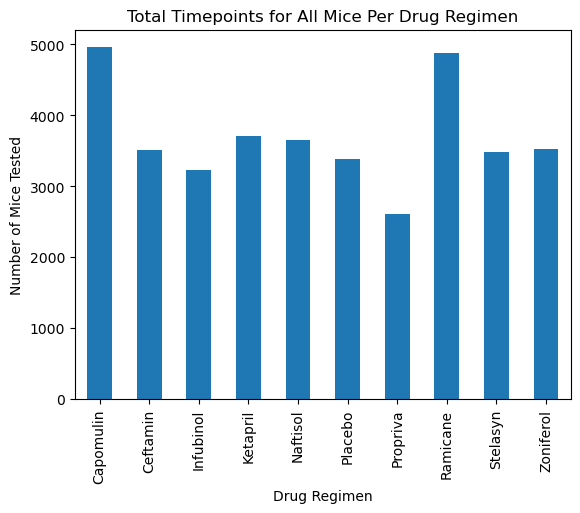

In [13]:
#generate a bar plot displaying the total number of timepoints for all mice tested per each drug regimen using Pandas
Bplot.plot.bar(x='Drug Regimen', y='Timepoint', rot=90, xlabel= 'Drug Regimen', ylabel='Number of Mice Tested', title='Total Timepoints for All Mice Per Drug Regimen');

<function matplotlib.pyplot.show(close=None, block=None)>

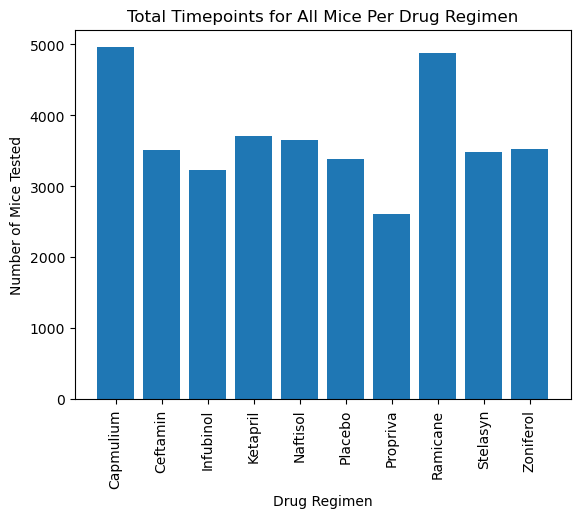

In [14]:
#generate a bar plot displaying the total number of timepoints for all mice tested per each drug regimen using Pyplot
regimen = ['Capmulium', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
timepoint = [4960, 3515, 3235, 3705, 3650, 3380, 2615, 4885, 3480, 3525]
plt.bar(regimen, timepoint)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.title('Total Timepoints for All Mice Per Drug Regimen')
plt.xticks(rotation=90)
plt.show

<AxesSubplot:title={'center':'Female vs Male Mice'}, ylabel='Sex'>

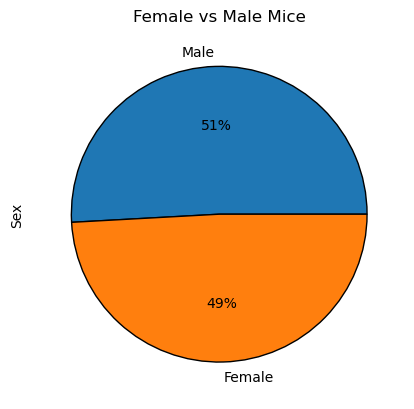

In [15]:
# Categorize clean data by Sex and show the distribution of female vs male through a Pandas pie chart 
sex_groups1 = Clean_Pymaceuticals['Sex'].value_counts().plot(kind='pie', y= 'Sex', autopct= '%1.0f%%', wedgeprops = {'edgecolor' :'black'}, title= 'Female vs Male Mice')
sex_groups1

In [18]:
sex_groups2 = Clean_Pymaceuticals['Sex'].value_counts()


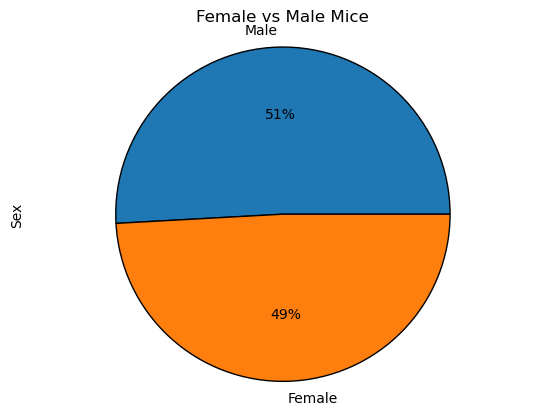

In [19]:
#show the distribution of female vs male through a matplotlib pie chart 
sexes = sex_groups2.value_counts()
count = sex_groups2.index
plt.pie(sex_groups2.values, labels=count, autopct='%1.0f%%', wedgeprops = {'edgecolor' :'black'})
plt.ylabel('Sex')
plt.title('Female vs Male Mice')
plt.axis('equal')

plt.show()

In [20]:
last_timepoint = Clean_Pymaceuticals.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [21]:
final_tumor_volume = pd.merge(last_timepoint, Clean_Pymaceuticals, on=['Mouse ID','Timepoint'])
final_tumor_volume.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
5,a401,45,Zoniferol,Female,8,25,66.794156,4
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
8,a457,10,Ketapril,Female,11,30,49.783419,0
9,a492,45,Stelasyn,Male,20,25,60.122011,1


In [22]:
#Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

four_treatments = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(['Capomulin','Ramicane', 'Infubinol', 'Ceftamin'])]
four_treatments.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
10,a520,45,Ramicane,Male,13,21,38.810366,1
11,a577,30,Infubinol,Female,6,25,57.031862,2
12,a644,45,Ramicane,Female,7,17,32.978522,1
13,a685,45,Infubinol,Male,8,30,66.083066,3
19,b128,45,Capomulin,Female,9,22,38.982878,2


In [23]:
#Create a list that holds the treatment names as well as a second, empty list to hold the tumor volume data.
treatment_names = ['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']
tumor_volume_data = []

In [24]:
#Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. Append the resulting final tumor volumes for each drug to the empty list.
for treatment in treatment_names:
    treatment_df = four_treatments[four_treatments["Drug Regimen"] == treatment]
    tumor_volume_data.append(treatment_df["Tumor Volume (mm3)"].tolist())

In [25]:
# Determine the outliers using the upper and lower bound
for i in range(len(tumor_volume_data)):
    treatment_volumes = tumor_volume_data[i]
    quartiles = np.percentile(treatment_volumes, [25,50,75])
    lowerq = quartiles[0]
    upperq = quartiles[2]
    iqr = upperq - lowerq
    upper_bound = upperq + (1.5*iqr)
    lower_bound = lowerq - (1.5*iqr)
    outliers = []
    
    for volume in treatment_volumes:
        if volume < lower_bound or volume > upper_bound:
            outliers.append(volume)
    print(f"Outliers for {treatment_names[i]} : {outliers}")

Outliers for Capomulin : []
Outliers for Ramicane : []
Outliers for Infubinol : [36.3213458]
Outliers for Ceftamin : []


<function matplotlib.pyplot.show(close=None, block=None)>

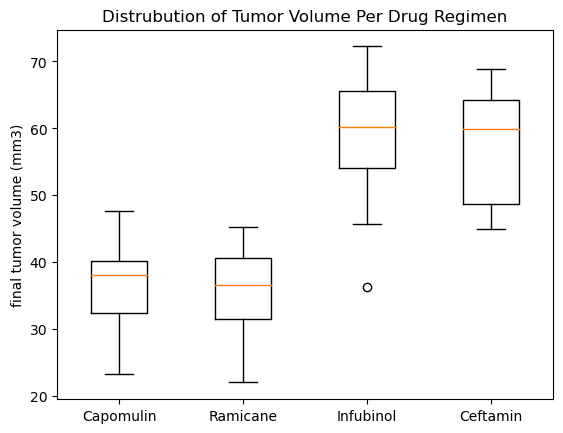

In [28]:
#generate box plot to show the distribution of tumor volume per treatment

fig, ax = plt.subplots()
ax.boxplot(tumor_volume_data, labels=treatment_names)
ax.set_ylabel('final tumor volume (mm3)')
plt.title('Distrubution of Tumor Volume Per Drug Regimen')
plt.show

In [29]:
# Select Mouse treated by Capomulin
Capomulin_mouse = Clean_Pymaceuticals[Clean_Pymaceuticals['Mouse ID'] == 'g316']
Capomulin_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
351,g316,Capomulin,Female,22,22,0,45.000000,0
352,g316,Capomulin,Female,22,22,5,44.022752,0
353,g316,Capomulin,Female,22,22,10,44.502042,0
354,g316,Capomulin,Female,22,22,15,45.216743,0
355,g316,Capomulin,Female,22,22,20,45.933322,1
356,g316,Capomulin,Female,22,22,25,46.809225,1
357,g316,Capomulin,Female,22,22,30,44.221480,2
358,g316,Capomulin,Female,22,22,35,44.702833,2
359,g316,Capomulin,Female,22,22,40,45.565821,2
360,g316,Capomulin,Female,22,22,45,40.159220,2


<function matplotlib.pyplot.show(close=None, block=None)>

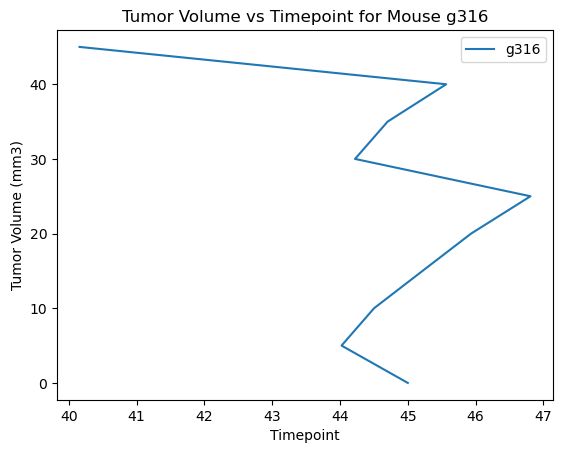

In [30]:
# create a line plot to show tumor volume vs timepoint for selected mouse
plt.plot(Capomulin_mouse['Tumor Volume (mm3)'],Capomulin_mouse ['Timepoint'], label='g316')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Timepoint for Mouse g316')
plt.legend()
plt.show

In [31]:
# Create a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# first group by the Capomulin regimen 

capomulin_regimen = Clean_Pymaceuticals[Clean_Pymaceuticals['Drug Regimen'].isin(['Capomulin'])]

In [32]:
# then, calculate average tumor volume for the Capomulin regimen
mouse_tumor_volume = capomulin_regimen['Tumor Volume (mm3)']
mouse_weight = capomulin_regimen['Weight (g)']

<function matplotlib.pyplot.show(close=None, block=None)>

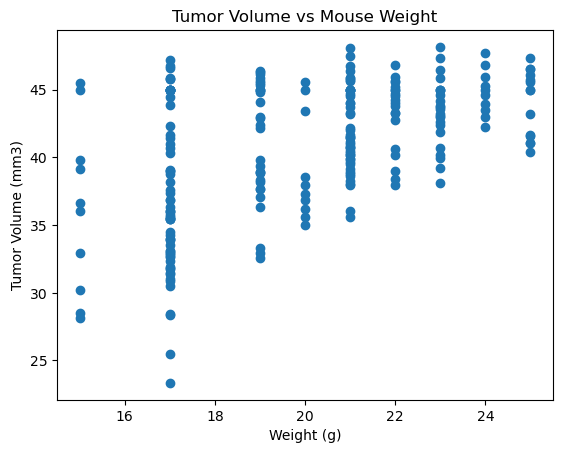

In [33]:
# generate scatter plot for tumor volume vs mouse weight for Capomulin 
plt.scatter(mouse_weight, mouse_tumor_volume, label='AverageTumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Mouse Weight')
plt.show

In [34]:
# Calculate the correlation coefficient and linear regression model for mouse weight and tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight,mouse_tumor_volume)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.53


In [35]:
#testing the above
np.corrcoef(mouse_weight,mouse_tumor_volume)[0][1]

0.5256995552077166

In [36]:
#calculate linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_regimen["Weight (g)"], capomulin_regimen["Tumor Volume (mm3)"])
slope

0.9609669432428346

In [37]:
intercept

21.489827213299584

In [38]:
best_fit_line = slope * capomulin_regimen["Weight (g)"] + intercept

<function matplotlib.pyplot.show(close=None, block=None)>

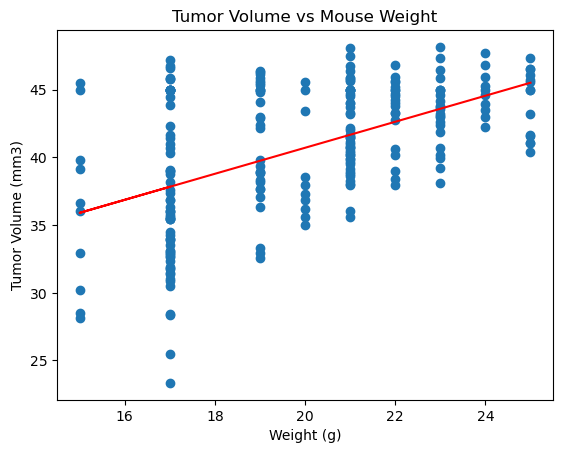

In [39]:
#Plot the linear regression model on top of the previous scatter plot.
plt.scatter(mouse_weight, mouse_tumor_volume, label='AverageTumor Volume (mm3)')
plt.plot(mouse_weight,best_fit_line, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs Mouse Weight')
plt.show